# Importação da bibliotecas

In [1]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd
import utils_imagem as utl

# Definição de constantes

In [2]:
m = 180 # altura da imagem
n = 130 # largura da imagem
DIMENSAO_IMAGEM = (m, n)

# Altera o valor da constante no módulo de processamento de imagens
utl.DIMENSAO_IMAGEM = DIMENSAO_IMAGEM

utl.NOME_AMBIENTE = 'FEI'

# Gerar matrizes A e M, e a face média 

In [3]:
# Matriz A(mn x q) na qual as colunas são as 'q' imagens do banco de imagens
(q, A) = utl.varrer_banco_imagens('src/FEI_face_db/*')

# Vetor f(mn x 1) com a média das colunas A, no caso, a face média
face_media = np.mean(A, axis=1, keepdims=True)

# Altera o valor da constante no módulo de processamento de imagens
utl.FACE_MEDIA = face_media

# Matriz M(mn x q) de média corrigida
M = A - face_media 

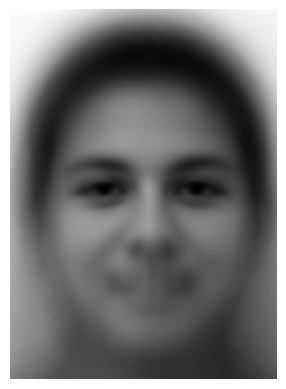

In [4]:
utl.plotar_imagem(face_media)

# Visualizar as faces originais (em A) e as faces corrigidas pela média (em M)

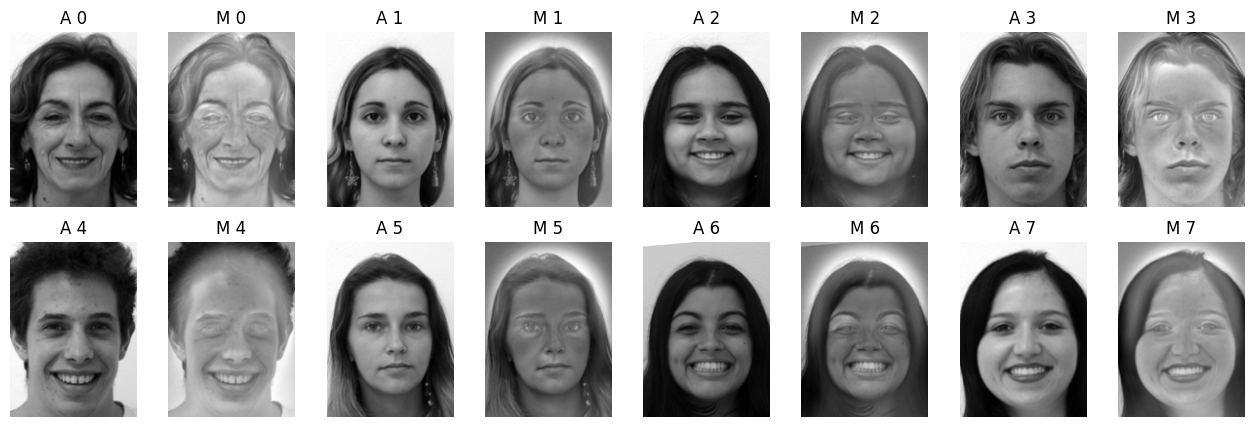

In [5]:
utl.plotar_grade_alternada((A,M), ('A','M'), True, 2, 8, (16,5), '')

# Gerar matriz C, além da decomposição SVD de A e C

In [6]:
# Matriz de covariância de A, C(mn x mn)
C = np.cov(M)

In [7]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_A, autovalores_A, _ = np.linalg.svd(A, full_matrices=False) # U já está ordenada em relação aos autovalores

In [8]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
componentes = U_A.shape[1] # valor arbitrário, decidido para as matrizes ficarem pareadas
U_C, autovalores_C, VT_C = randomized_svd(C, n_components=componentes, n_iter=5, random_state=None)

In [9]:
# Apaga C da memória (liberando 4gb) por não ser mais necessária
del C

# Visualizar eigenfaces de A

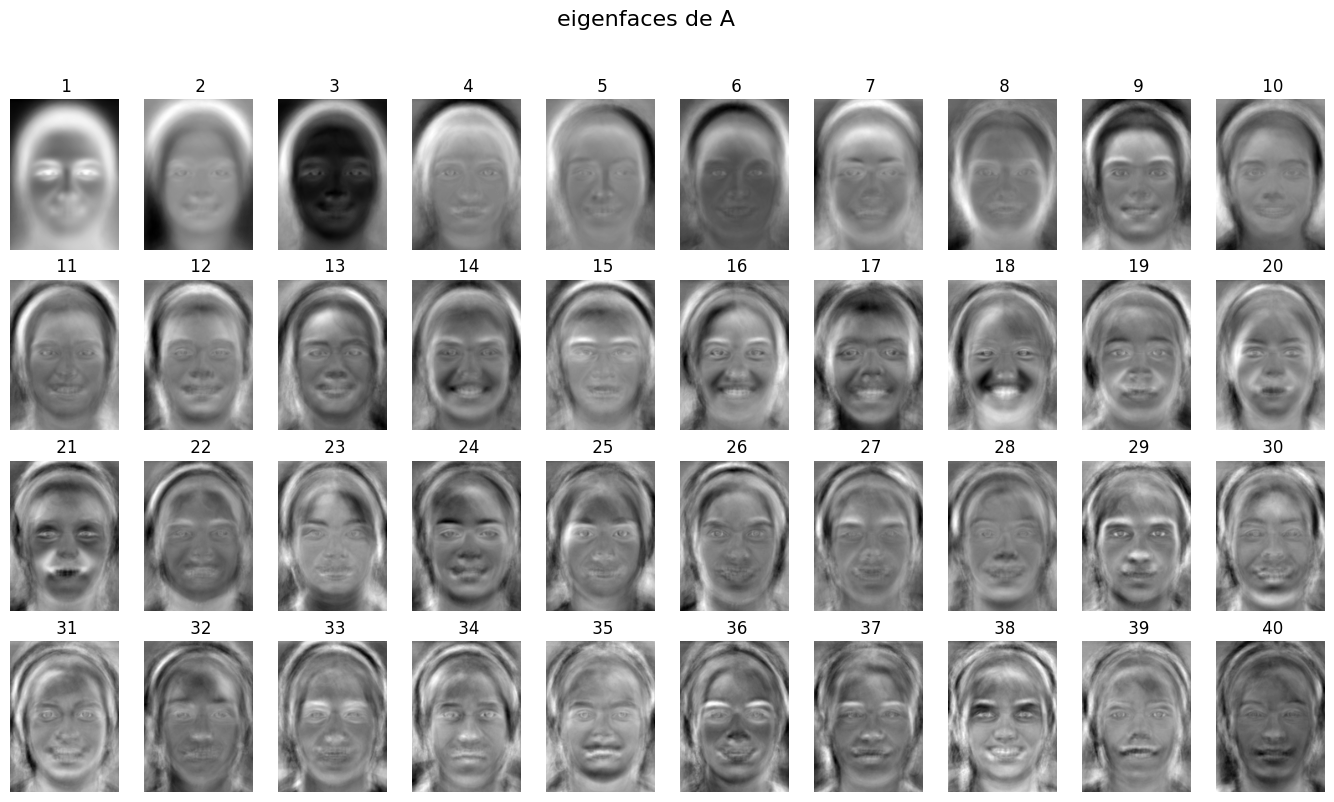

In [10]:
utl.plotar_grade(U_A, '', 4, 10, (17,9), 'eigenfaces de A')

# Visualizar eigenfaces C

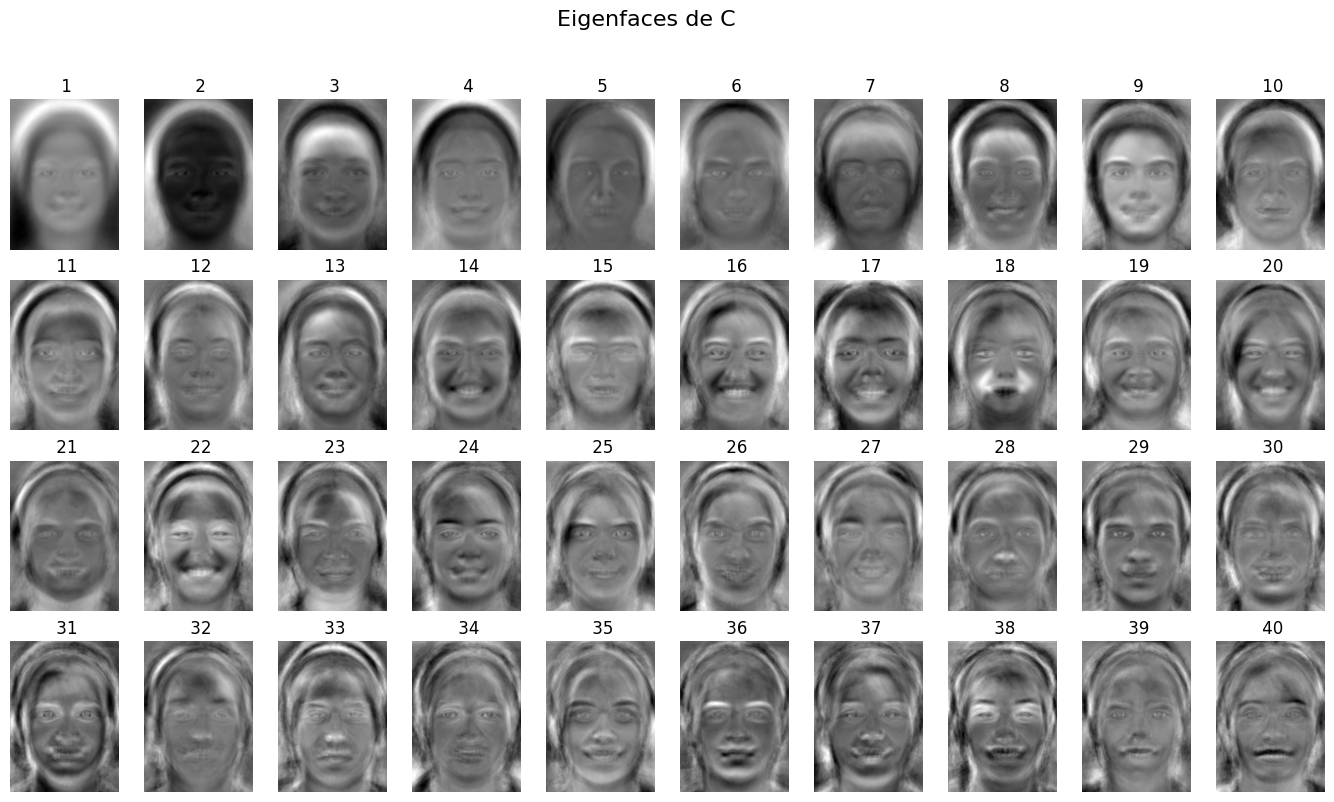

In [11]:
utl.plotar_grade(U_C, '', 4, 10, (17,9), 'Eigenfaces de C')

# Comparação entre as eigenfaces originadas de C e A

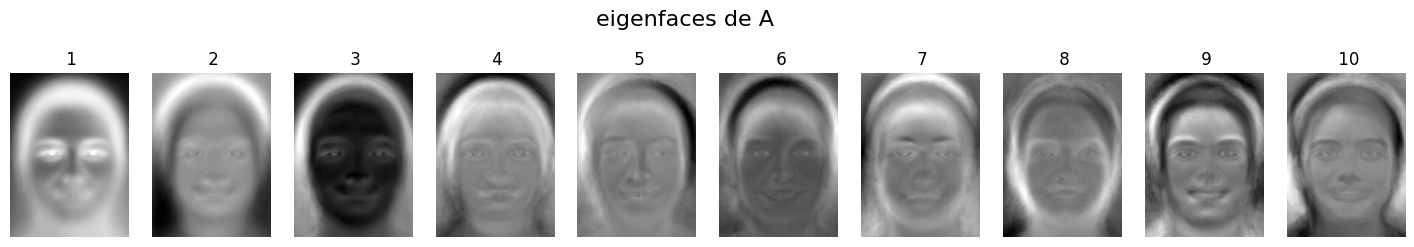

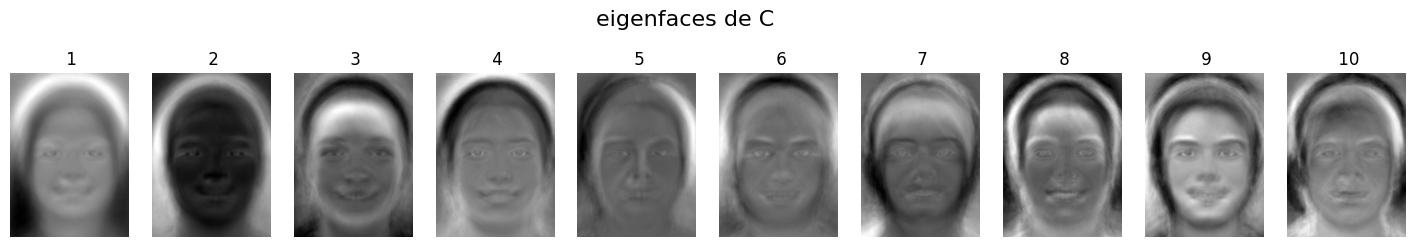

In [12]:
utl.plotar_grade(U_A, '', 1, 10, (18,3), 'eigenfaces de A')
utl.plotar_grade(U_C, '', 1, 10, (18,3), 'eigenfaces de C')

# Reconstrução a partir de A (SVD) e C (PCA)

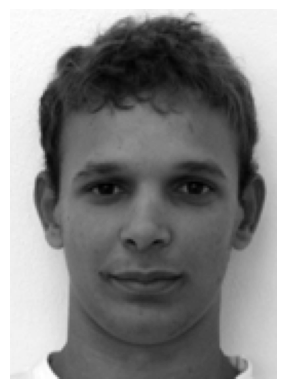

In [13]:
# Indice da pessoa a ter a imagem reconstruid# Indice da pessoa a ter a imagem reconstruida
imagem_escolhida = 100
utl.plotar_imagem(A[:,imagem_escolhida])

In [14]:
# Coeficientes de projeção para as eigenfaces de U_A e U_C
coef_A = np.dot(U_A.T, M) 
coef_C = np.dot(U_C.T, M)

In [15]:
# Define intervalo para a quantidade de dimensoes para a reconstrução
intervalo = [5, 10, 20, 40, 70, 100, 140, 200, 300, 400]

# Gera uma lista com imagens reconstruidas considerando a quantidade de eigenfaces na lista 'intervalo'
img_proj_A = utl.listar_projecoes(U_A, coef_A, intervalo, imagem_escolhida)
img_proj_C = utl.listar_projecoes(U_C, coef_C, intervalo, imagem_escolhida)

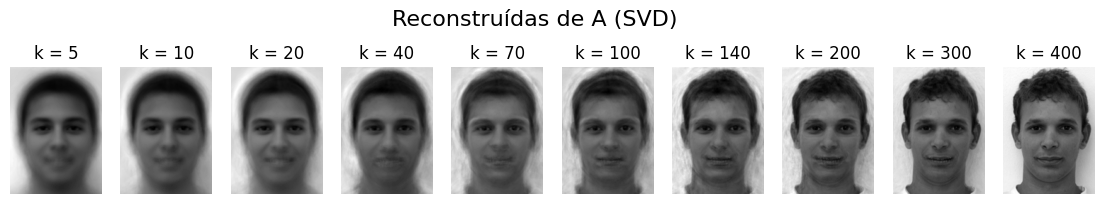

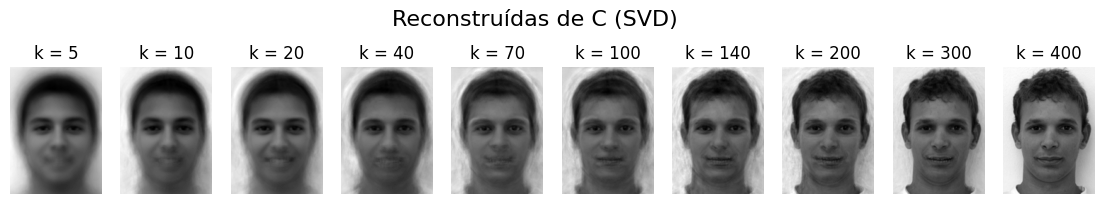

In [16]:
# Plotagem das imagens
utl.plotar_grade(img_proj_A, intervalo, 1, len(intervalo), (14,2.5), 'Reconstruídas de A (SVD)')
utl.plotar_grade(img_proj_C, intervalo, 1, len(intervalo), (14,2.5), 'Reconstruídas de C (SVD)')